In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['y_train.csv', 'sample_submission.csv', 'X_train.csv', 'X_test.csv']


In [2]:
train = pd.read_csv('../input/X_train.csv')
test = pd.read_csv('../input/X_test.csv')
y_train = pd.read_csv('../input/y_train.csv')


In [3]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

In [4]:
train.columns.values.tolist()

['row_id',
 'series_id',
 'measurement_number',
 'orientation_X',
 'orientation_Y',
 'orientation_Z',
 'orientation_W',
 'angular_velocity_X',
 'angular_velocity_Y',
 'angular_velocity_Z',
 'linear_acceleration_X',
 'linear_acceleration_Y',
 'linear_acceleration_Z']

In [5]:
y_train.columns.values.tolist()

['series_id', 'group_id', 'surface']

In [6]:
train_merge = train.merge(y_train, on = 'series_id')


In [7]:
train_merge.columns.values.tolist()

['row_id',
 'series_id',
 'measurement_number',
 'orientation_X',
 'orientation_Y',
 'orientation_Z',
 'orientation_W',
 'angular_velocity_X',
 'angular_velocity_Y',
 'angular_velocity_Z',
 'linear_acceleration_X',
 'linear_acceleration_Y',
 'linear_acceleration_Z',
 'group_id',
 'surface']

In [8]:
y_train.nunique()

series_id    3810
group_id       73
surface         9
dtype: int64

In [9]:
unique_series = train_merge.nunique()

In [10]:
unique_data_frame = pd.DataFrame(unique_series, columns = ['Unique Values'])

In [11]:
unique_data_frame['Percentage of unique values'] = unique_data_frame*100/len(train)

In [12]:
unique_data_frame

,Unique Values,Percentage of unique values
row_id,487680,100.000000
series_id,3810,0.781250
measurement_number,128,0.026247
orientation_X,163952,33.618766
orientation_Y,151162,30.996145
orientation_Z,134570,27.593914
orientation_W,140660,28.842684
angular_velocity_X,162043,33.227321
angular_velocity_Y,151146,30.992864
angular_velocity_Z,201611,41.340838


In [13]:
test.columns.values.tolist()

['row_id',
 'series_id',
 'measurement_number',
 'orientation_X',
 'orientation_Y',
 'orientation_Z',
 'orientation_W',
 'angular_velocity_X',
 'angular_velocity_Y',
 'angular_velocity_Z',
 'linear_acceleration_X',
 'linear_acceleration_Y',
 'linear_acceleration_Z']

In [14]:
test.nunique()

row_id                   488448
series_id                  3816
measurement_number          128
orientation_X            160946
orientation_Y            149728
orientation_Z            121701
orientation_W            138668
angular_velocity_X       159433
angular_velocity_Y       150410
angular_velocity_Z       202351
linear_acceleration_X    243392
linear_acceleration_Y    112608
linear_acceleration_Z     73231
dtype: int64

In [15]:
test_merge = test.merge(y_train, on='series_id')
test_merge.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439,13,fine_concrete
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273,13,fine_concrete
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990,13,fine_concrete
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270,13,fine_concrete
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100,13,fine_concrete


In [16]:
sample_submission.head()

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


In [17]:
# dummy_sol = test_merge[['series_id', 'surface']]

In [18]:
# dummy_sol.head(3)

In [19]:
# dummy_sol.to_csv('first_solution.csv', index=False)

In [20]:
series_id_unique = test['series_id'].unique()
series_id_unique


array([   0,    1,    2, ..., 3813, 3814, 3815])

In [21]:
second_sol = pd.DataFrame(series_id_unique,columns=['series_id'])

In [22]:
second_sol['surface']='fine_concrete'

In [23]:
second_sol.to_csv('second_sol.csv',index=False)

In [24]:
train[train['series_id']==3]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
384,3_0,3,0,-0.93940,0.31003,0.038299,-0.14123,-0.326890,0.070941,-0.065173,0.602480,1.701600,-7.1944
385,3_1,3,1,-0.93948,0.31004,0.038187,-0.14067,-0.093026,0.035097,-0.035404,1.331800,-3.146700,-16.9640
386,3_2,3,2,-0.93955,0.31005,0.038161,-0.14022,0.351380,-0.090830,-0.016683,-1.604900,-4.606800,-18.3290
387,3_3,3,3,-0.93965,0.31005,0.038035,-0.13959,0.519130,-0.059721,-0.032575,2.596200,-0.822880,-10.0720
388,3_4,3,4,-0.93968,0.31007,0.037922,-0.13934,0.217070,0.023137,0.012872,-1.119300,1.041700,-1.9426
389,3_5,3,5,-0.93959,0.30992,0.038220,-0.14023,-0.211480,-0.028029,-0.025393,-0.544770,0.631620,-3.3811
390,3_6,3,6,-0.93952,0.30994,0.038338,-0.14062,-0.327970,0.003082,0.034569,1.598400,-4.526600,-14.9470
391,3_7,3,7,-0.93950,0.30996,0.038369,-0.14066,-0.036904,-0.016934,0.017041,-2.504100,-5.825100,-19.8450
392,3_8,3,8,-0.93955,0.31002,0.038265,-0.14026,0.328100,-0.024325,0.029710,1.706100,-3.841300,-15.9440
393,3_9,3,9,-0.93957,0.31007,0.038181,-0.14001,0.330960,-0.043945,0.045274,-1.694600,-1.048700,-5.3325


In [25]:
series_0 = train[train['series_id']==0]
measurement_series = series_0['measurement_number']


In [26]:
orientation_X = series_0['orientation_X']
orientation_Y = series_0['orientation_Y']
angular_velocity_X = series_0['angular_velocity_X']
angular_velocity_Y = series_0['angular_velocity_Y']

In [27]:
import matplotlib.pyplot as plt

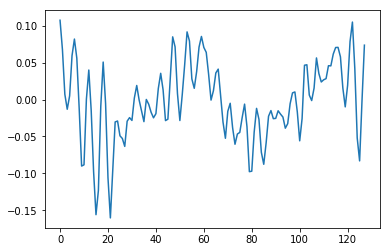

In [28]:
# plt.plot(measurement_series,orientation_series )
plt.plot(measurement_series,angular_velocity_X )

In [29]:
new_df = train
agg_id = 'series_id'
drop_columns = ['row_id', 'measurement_number']
new_df = new_df.drop(columns = drop_columns)
new_df = new_df.groupby(agg_id).agg(['mean', 'max', 'min', 'sum'])
new_df.columns = ['_'.join(col) for col in new_df.columns.values]
new_df = new_df.loc[:,~new_df.columns.duplicated()]

In [30]:
print(1)

1


In [31]:
def aggregate_cols(df, agg_id, drop_columns):
    df = df.drop(columns = drop_columns)
    df = df.groupby(agg_id).agg(['mean', 'max', 'min', 'sum'])
    df.columns = ['_'.join(col) for col in df.columns.values]
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [32]:
drop_columns = ['row_id', 'measurement_number']
agg_id = 'series_id'


In [33]:
train_features = aggregate_cols(train, agg_id, drop_columns)
train_features.head(2)

,orientation_X_mean,orientation_X_max,orientation_X_min,orientation_X_sum,orientation_Y_mean,orientation_Y_max,orientation_Y_min,orientation_Y_sum,orientation_Z_mean,orientation_Z_max,orientation_Z_min,orientation_Z_sum,orientation_W_mean,orientation_W_max,orientation_W_min,orientation_W_sum,angular_velocity_X_mean,angular_velocity_X_max,angular_velocity_X_min,angular_velocity_X_sum,angular_velocity_Y_mean,angular_velocity_Y_max,angular_velocity_Y_min,angular_velocity_Y_sum,angular_velocity_Z_mean,angular_velocity_Z_max,angular_velocity_Z_min,angular_velocity_Z_sum,linear_acceleration_X_mean,linear_acceleration_X_max,linear_acceleration_X_min,linear_acceleration_X_sum,linear_acceleration_Y_mean,linear_acceleration_Y_max,linear_acceleration_Y_min,linear_acceleration_Y_sum,linear_acceleration_Z_mean,linear_acceleration_Z_max,linear_acceleration_Z_min,linear_acceleration_Z_sum
series_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.75822,-0.75953,-97.10922,-0.634008,-0.63306,-0.63456,-81.15298,-0.105474,-0.104610,-0.106140,-13.500690,-0.106470,-0.10559,-0.10705,-13.62811,-0.002481,0.10765,-0.16041,-0.317527,-0.003306,0.072698,-0.079404,-0.423172,0.007532,0.05172,-0.030181,0.964051,0.263418,2.8538,-1.8644,33.717542,2.984195,5.3864,0.075417,381.976947,-9.320391,-6.2681,-12.512,-1193.0100
1,-0.958606,-0.95837,-0.95896,-122.70162,0.241867,0.24270,0.24074,30.95897,0.031650,0.032341,0.030504,4.051239,-0.146876,-0.14587,-0.14809,-18.80007,0.004605,0.28342,-0.25480,0.589410,-0.007757,0.112080,-0.134330,-0.992868,0.006206,0.12915,-0.121610,0.794404,0.121867,5.1002,-3.1934,15.599035,2.768193,6.6850,-2.149200,354.328696,-9.388899,-2.7449,-16.928,-1201.7791


In [34]:
train_labels = y_train['surface']
# train_labels = train_labels.loc[:,~train_labels.columns.duplicated()]

In [35]:
train_labels.head(2)

0    fine_concrete
1         concrete
Name: surface, dtype: object

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [37]:
scaler.fit(train_features)
train_features = scaler.transform(train_features)

In [38]:
test_features = aggregate_cols(test, agg_id, drop_columns)

In [39]:
# scaler.fit(test_features)
test_features = scaler.transform(test_features)

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.0001)

In [41]:
log_reg.fit(train_features,train_labels)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [42]:
predictions = log_reg.predict(test_features)

In [43]:
test_features = aggregate_cols(test, agg_id, drop_columns)

In [44]:
submit_df = pd.DataFrame(test_features.reset_index()['series_id'],columns=['series_id'])

In [45]:
submit_df['surface']= predictions

In [46]:
submit_df.to_csv('third_sol_log.csv',index=False)

In [47]:
# Random Forest Code
from sklearn.ensemble import RandomForestClassifier

In [48]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose= 1, n_jobs = -1)

In [49]:
random_forest.fit(train_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [50]:
predictions = random_forest.predict_proba(test_features)[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [51]:
submit_df = pd.DataFrame(test_features.reset_index()['series_id'],columns=['series_id'])

In [52]:
submit_df['surface']= predictions

In [53]:
submit_df.to_csv('Fourth_sol_random_forest.csv',index=False)

In [54]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime

import json
import ast
import eli5
import shap
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split
from sklearn.linear_model import Ridge, RidgeCV
import gc
from catboost import CatBoostClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import altair as alt
from  altair.vega import v3
from IPython.display import HTML
from sklearn.linear_model import LinearRegression

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge

In [55]:
def calc_change_rate(x):
    change = (np.diff(x) / x[:-1]).values
    change = change[np.nonzero(change)[0]]
    change = change[~np.isnan(change)]
    change = change[change != -np.inf]
    change = change[change != np.inf]
    return np.mean(change)

def add_trend_feature(arr, abs_values=False):
    idx = np.array(range(len(arr)))
    if abs_values:
        arr = np.abs(arr)
    lr = LinearRegression()
    lr.fit(idx.reshape(-1, 1), arr)
    return lr.coef_[0]

def classic_sta_lta(x, length_sta, length_lta):
    
    sta = np.cumsum(x ** 2)

    # Convert to float
    sta = np.require(sta, dtype=np.float)

    # Copy for LTA
    lta = sta.copy()

    # Compute the STA and the LTA
    sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
    sta /= length_sta
    lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
    lta /= length_lta

    # Pad zeros
    sta[:length_lta - 1] = 0

    # Avoid division by zero by setting zero values to tiny float
    dtiny = np.finfo(0.0).tiny
    idx = lta < dtiny
    lta[idx] = dtiny

    return sta / lta


In [56]:
train_df = train[['series_id']].drop_duplicates().reset_index(drop=True)

In [57]:
for col in tqdm_notebook(train.columns[3:]):
    train_df[col + '_mean'] = train.groupby(['series_id'])[col].mean()
    train_df[col + '_std'] = train.groupby(['series_id'])[col].std()
    train_df[col + '_max'] = train.groupby(['series_id'])[col].max()
    train_df[col + '_min'] = train.groupby(['series_id'])[col].min()
    train_df[col + '_max_to_min'] = train_df[col + '_max'] / train_df[col + '_min']

    for i in train_df['series_id']:
        train_df.loc[i, col + '_mean_change_abs'] = np.mean(np.diff(train.loc[train['series_id'] == i, col]))
        train_df.loc[i, col + '_mean_change_rate'] = calc_change_rate(train.loc[train['series_id'] == i, col])
        
        train_df.loc[i, col + '_q95'] = np.quantile(train.loc[train['series_id'] == i, col], 0.95)
        train_df.loc[i, col + '_q99'] = np.quantile(train.loc[train['series_id'] == i, col], 0.99)
        train_df.loc[i, col + '_q05'] = np.quantile(train.loc[train['series_id'] == i, col], 0.05)
        
        train_df.loc[i, col + '_abs_min'] = np.abs(train.loc[train['series_id'] == i, col]).min()
        train_df.loc[i, col + '_abs_max'] = np.abs(train.loc[train['series_id'] == i, col]).max()
        
        train_df.loc[i, col + '_trend'] = add_trend_feature(train.loc[train['series_id'] == i, col].values)
        train_df.loc[i, col + '_abs_trend'] = add_trend_feature(train.loc[train['series_id'] == i, col].values, abs_values=True)
        train_df.loc[i, col + '_abs_mean'] = np.abs(train.loc[train['series_id'] == i, col]).mean()
        train_df.loc[i, col + '_abs_std'] = np.abs(train.loc[train['series_id'] == i, col]).std()
        
        train_df.loc[i, col + '_mad'] = train.loc[train['series_id'] == i, col].mad()
        train_df.loc[i, col + '_kurt'] = train.loc[train['series_id'] == i, col].kurtosis()
        train_df.loc[i, col + '_skew'] = train.loc[train['series_id'] == i, col].skew()
        train_df.loc[i, col + '_med'] = train.loc[train['series_id'] == i, col].median()
        
        train_df.loc[i, col + '_Hilbert_mean'] = np.abs(hilbert(train.loc[train['series_id'] == i, col])).mean()
        
        train_df.loc[i, col + '_Hann_window_mean'] = (convolve(train.loc[train['series_id'] == i, col], hann(15), mode='same') / sum(hann(15))).mean()
        train_df.loc[i, col + '_classic_sta_lta1_mean'] = classic_sta_lta(train.loc[train['series_id'] == i, col], 10, 50).mean()

        train_df.loc[i, col + '_Moving_average_10_mean'] = train.loc[train['series_id'] == i, col].rolling(window=10).mean().mean(skipna=True)
        train_df.loc[i, col + '_Moving_average_16_mean'] = train.loc[train['series_id'] == i, col].rolling(window=16).mean().mean(skipna=True)
        train_df.loc[i, col + '_Moving_average_10_std'] = train.loc[train['series_id'] == i, col].rolling(window=10).std().mean(skipna=True)
        train_df.loc[i, col + '_Moving_average_16_std'] = train.loc[train['series_id'] == i, col].rolling(window=16).std().mean(skipna=True)
        
        train_df.loc[i, col + 'iqr'] = np.subtract(*np.percentile(train.loc[train['series_id'] == i, col], [75, 25]))
        train_df.loc[i, col + 'ave10'] = stats.trim_mean(train.loc[train['series_id'] == i, col], 0.1)

In [58]:
train_df.shape

(3810, 291)

In [59]:
sub = pd.read_csv('../input/sample_submission.csv')
test_df = sub[['series_id']]

In [60]:
for col in tqdm_notebook(test.columns[3:]):
    test_df[col + '_mean'] = test.groupby(['series_id'])[col].mean()
    test_df[col + '_std'] = test.groupby(['series_id'])[col].std()
    test_df[col + '_max'] = test.groupby(['series_id'])[col].max()
    test_df[col + '_min'] = test.groupby(['series_id'])[col].min()
    test_df[col + '_max_to_min'] = test_df[col + '_max'] / test_df[col + '_min']

    for i in test_df['series_id']:
        test_df.loc[i, col + '_mean_change_abs'] = np.mean(np.diff(test.loc[test['series_id'] == i, col]))
        test_df.loc[i, col + '_mean_change_rate'] = calc_change_rate(test.loc[test['series_id'] == i, col])
        
        test_df.loc[i, col + '_q95'] = np.quantile(test.loc[test['series_id'] == i, col], 0.95)
        test_df.loc[i, col + '_q99'] = np.quantile(test.loc[test['series_id'] == i, col], 0.99)
        test_df.loc[i, col + '_q05'] = np.quantile(test.loc[test['series_id'] == i, col], 0.05)
        
        test_df.loc[i, col + '_abs_min'] = np.abs(test.loc[test['series_id'] == i, col]).min()
        test_df.loc[i, col + '_abs_max'] = np.abs(test.loc[test['series_id'] == i, col]).max()
        
        test_df.loc[i, col + '_trend'] = add_trend_feature(test.loc[test['series_id'] == i, col].values)
        test_df.loc[i, col + '_abs_trend'] = add_trend_feature(test.loc[test['series_id'] == i, col].values, abs_values=True)
        test_df.loc[i, col + '_abs_mean'] = np.abs(test.loc[test['series_id'] == i, col]).mean()
        test_df.loc[i, col + '_abs_std'] = np.abs(test.loc[test['series_id'] == i, col]).std()
        
        test_df.loc[i, col + '_mad'] = test.loc[test['series_id'] == i, col].mad()
        test_df.loc[i, col + '_kurt'] = test.loc[test['series_id'] == i, col].kurtosis()
        test_df.loc[i, col + '_skew'] = test.loc[test['series_id'] == i, col].skew()
        test_df.loc[i, col + '_med'] = test.loc[test['series_id'] == i, col].median()
        
        test_df.loc[i, col + '_Hilbert_mean'] = np.abs(hilbert(test.loc[test['series_id'] == i, col])).mean()
        
        test_df.loc[i, col + '_Hann_window_mean'] = (convolve(test.loc[test['series_id'] == i, col], hann(15), mode='same') / sum(hann(15))).mean()
        test_df.loc[i, col + '_classic_sta_lta1_mean'] = classic_sta_lta(test.loc[test['series_id'] == i, col], 10, 50).mean()

        test_df.loc[i, col + '_Moving_average_10_mean'] = test.loc[test['series_id'] == i, col].rolling(window=10).mean().mean(skipna=True)
        test_df.loc[i, col + '_Moving_average_16_mean'] = test.loc[test['series_id'] == i, col].rolling(window=16).mean().mean(skipna=True)
        test_df.loc[i, col + '_Moving_average_10_std'] = test.loc[test['series_id'] == i, col].rolling(window=10).std().mean(skipna=True)
        test_df.loc[i, col + '_Moving_average_16_std'] = test.loc[test['series_id'] == i, col].rolling(window=16).std().mean(skipna=True)
        
        test_df.loc[i, col + 'iqr'] = np.subtract(*np.percentile(test.loc[test['series_id'] == i, col], [75, 25]))
        test_df.loc[i, col + 'ave10'] = stats.trim_mean(test.loc[test['series_id'] == i, col], 0.1)

In [61]:
test_df.head(2)

,series_id,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_mean_change_abs,orientation_X_mean_change_rate,orientation_X_q95,orientation_X_q99,orientation_X_q05,orientation_X_abs_min,orientation_X_abs_max,orientation_X_trend,orientation_X_abs_trend,orientation_X_abs_mean,orientation_X_abs_std,orientation_X_mad,orientation_X_kurt,orientation_X_skew,orientation_X_med,orientation_X_Hilbert_mean,orientation_X_Hann_window_mean,orientation_X_classic_sta_lta1_mean,orientation_X_Moving_average_10_mean,orientation_X_Moving_average_16_mean,orientation_X_Moving_average_10_std,orientation_X_Moving_average_16_std,orientation_Xiqr,orientation_Xave10,orientation_Y_mean,orientation_Y_std,orientation_Y_max,orientation_Y_min,orientation_Y_max_to_min,orientation_Y_mean_change_abs,orientation_Y_mean_change_rate,orientation_Y_q95,orientation_Y_q99,orientation_Y_q05,...,linear_acceleration_Y_skew,linear_acceleration_Y_med,linear_acceleration_Y_Hilbert_mean,linear_acceleration_Y_Hann_window_mean,linear_acceleration_Y_classic_sta_lta1_mean,linear_acceleration_Y_Moving_average_10_mean,linear_acceleration_Y_Moving_average_16_mean,linear_acceleration_Y_Moving_average_10_std,linear_acceleration_Y_Moving_average_16_std,linear_acceleration_Yiqr,linear_acceleration_Yave10,linear_acceleration_Z_mean,linear_acceleration_Z_std,linear_acceleration_Z_max,linear_acceleration_Z_min,linear_acceleration_Z_max_to_min,linear_acceleration_Z_mean_change_abs,linear_acceleration_Z_mean_change_rate,linear_acceleration_Z_q95,linear_acceleration_Z_q99,linear_acceleration_Z_q05,linear_acceleration_Z_abs_min,linear_acceleration_Z_abs_max,linear_acceleration_Z_trend,linear_acceleration_Z_abs_trend,linear_acceleration_Z_abs_mean,linear_acceleration_Z_abs_std,linear_acceleration_Z_mad,linear_acceleration_Z_kurt,linear_acceleration_Z_skew,linear_acceleration_Z_med,linear_acceleration_Z_Hilbert_mean,linear_acceleration_Z_Hann_window_mean,linear_acceleration_Z_classic_sta_lta1_mean,linear_acceleration_Z_Moving_average_10_mean,linear_acceleration_Z_Moving_average_16_mean,linear_acceleration_Z_Moving_average_10_std,linear_acceleration_Z_Moving_average_16_std,linear_acceleration_Ziqr,linear_acceleration_Zave10
0,0,-0.0258099140625,0.000284321184339,-0.025156,-0.026418,0.952229540464835,0.000004858267717,-0.000187732735100,-0.0254506,-0.02525916,-0.02631435,0.025156,0.026418,0.000002964352339,-0.000002964352339,0.0258099140625,0.000284321184339,0.000238183227539,-0.690756636033587,-0.389316169675856,-0.025748,0.025811465602261,-0.025400545432888,0.613895497269360,-0.025833795798319,-0.025846340707965,0.000138842025219,0.000195694961230,0.000434,-0.025796019230769,-0.988644296875,0.000039158140790,-0.98854,-0.98873,0.999807834292476,-0.000000629921260,0.000000801396391,-0.9885835,-0.9885481,-0.9887000,...,0.125562993958178,2.83825,3.123245527396153,2.821563417525220,0.629752316006780,2.854014453781510,2.855455763274337,1.065478368266448,1.099099466979149,1.527425000000000,2.869327884615385,-9.325264062499997,2.267267769136686,-3.9960,-16.362000000000002,0.244224422442244,0.000274803149606,0.037771530369773,-5.624820000000001,-4.194225999999999,-12.752950000000000,3.9960,16.362000000000002,-0.000390366347739,0.000390366347739,9.325264062499997,2.267267769136686,1.813453686523437,0.033811463020510,-0.047728222704004,-9.37560,9.603049090054000,-9.195881449728809,0.621688680253908,-9.366010504201686,-9.379178650442476,2.205957290578839,2.240229373574491,3.02465,-9.341320192307693
1,1,-0.9322877343750,0.000563834195268,-0.931480,-0.933720,0.997600993873966,-0.000017637795276,0.000022659851141,-0.9316935,-0.93155350,-0.93343300,0.931480,0.933720,-0.000014439004990,0.000014439004990,0.9322877343750,0.000563834195268,0.000480646972656,-0.393465458219343,-0.763506894366874,-0.932115,0.932287903476330,-0.917297133113091,0.617590517967361,-0.932264420168067,-0.932250442477876,0.000056511822620,0.000083595894379,0.000850,-0.9322255769230

In [62]:
train_df_2 = train_df.drop(['series_id'],axis=1)
test_df_2 = test_df.drop(['series_id'],axis=1)

In [63]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# scaler.fit(train_df_2)
# train = scaler.transform(train_df_2)
# test = scaler.transform(test_df_2)
train = train_df_2
test = test_df_2
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train,train_labels)
log_reg_pred = log_reg.predict(test)

In [64]:
submit_df = pd.DataFrame(test_features.reset_index()['series_id'],columns=['series_id'])
submit_df['surface']= log_reg_pred
submit_df.to_csv('Fifth_sol_feature_eng.csv',index=False)


In [65]:
print(test.shape)
print(train.shape)
log_reg_pred

(3816, 290)
(3810, 290)


array(['soft_tiles', 'soft_tiles', 'soft_tiles', ..., 'soft_tiles',
       'wood', 'wood'], dtype=object)